<a href="https://colab.research.google.com/github/GECK202/Colab/blob/main/Diseases_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Шаг 1. Ознакомление с данными

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Считываем данные
dftrain = pd.read_csv("/content/sample_data/Training.csv")
dftrain.tail()  # посмотрели

itching  skin_rash  ...                                prognosis  Unnamed: 133
4915        0          0  ...  (vertigo) Paroymsal  Positional Vertigo           NaN
4916        0          1  ...                                     Acne           NaN
4917        0          0  ...                  Urinary tract infection           NaN
4918        0          1  ...                                Psoriasis           NaN
4919        0          1  ...                                 Impetigo           NaN

[5 rows x 134 columns]

In [ ]:
dftrain.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [ ]:
dftrain.drop('Unnamed: 133', axis=1, inplace=True)
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
dftrain.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [ ]:
dftrain.nunique()

itching                  2
skin_rash                2
nodal_skin_eruptions     2
continuous_sneezing      2
shivering                2
                        ..
inflammatory_nails       2
blister                  2
red_sore_around_nose     2
yellow_crust_ooze        2
prognosis               41
Length: 133, dtype: int64

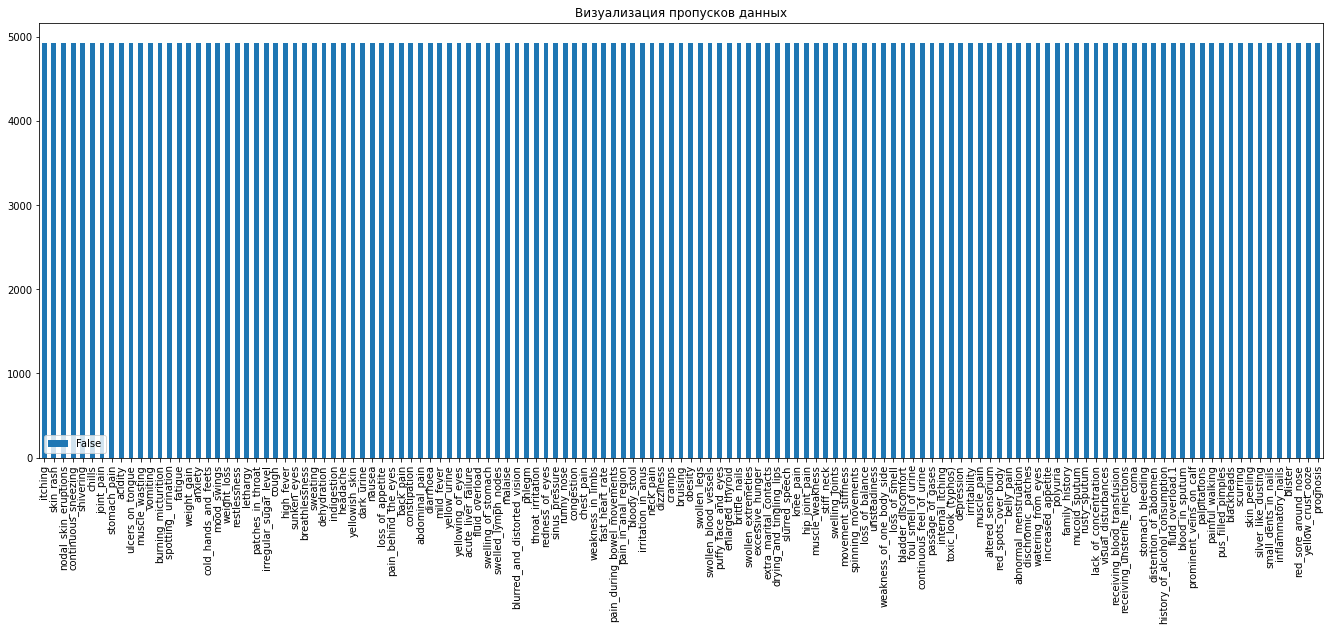

In [ ]:
dftrain.isna().apply(pd.Series.value_counts).transpose().plot(kind = 'bar', stacked = True, figsize = (23,8))
plt.legend(loc='lower left')
plt.title('Визуализация пропусков данных')
plt.show()

In [ ]:
df_concat = dftrain.groupby('prognosis').sum()
df_concat

itching  ...  yellow_crust_ooze
prognosis                                         ...                   
(vertigo) Paroymsal  Positional Vertigo        0  ...                  0
AIDS                                           0  ...                  0
Acne                                           0  ...                  0
Alcoholic hepatitis                            0  ...                  0
Allergy                                        0  ...                  0
Arthritis                                      0  ...                  0
Bronchial Asthma                               0  ...                  0
Cervical spondylosis                           0  ...                  0
Chicken pox                                  114  ...                  0
Chronic cholestasis                          114  ...                  0
Common Cold                                    0  ...                  0
Dengue                                         0  ...                  0
Diabetes                                       0  ...                  0
Dimorphic hemmorhoids(piles)                   0  ...                  0
Drug Reaction                                114  ...                  0
Fungal infection                             108  ...                  0
GERD                                           0  ...                  0
Gastroenteritis                                0  ...                  0
Heart attack                                   0  ...                  0
Hepatitis B                                  114  ...                  0
Hepatitis C                                    0  ...                  0
Hepatitis D                                    0  ...                  0
Hepatitis E                                    0  ...                  0
Hypertension                                   0  ...                  0
Hyperthyroidism                                0  ...                  0
Hypoglycemia                                   0  ...                  0
Hypothyroidism                                 0  ...                  0
Impetigo                                       0  ...                114
Jaundice                                     114  ...                  0
Malaria                                        0  ...                  0
Migraine                                       0  ...                  0
Osteoarthristis                                0  ...                  0
Paralysis (brain hemorrhage)                   0  ...                  0
Peptic ulcer diseae                            0  ...                  0
Pneumonia                                      0  ...                  0
Psoriasis                                      0  ...                  0
Tuberculosis                                   0  ...                  0
Typhoid                                        0  ...                  0
Urinary tract infection                        0  ...                  0
Varicose veins                                 0  ...                  0
hepatitis A                                    0  ...                  0

[41 rows x 132 columns]

In [ ]:
dftest = pd.read_csv("/content/sample_data/Testing.csv")
dftest.tail()  # посмотрели

itching  skin_rash  ...  yellow_crust_ooze                prognosis
37        0          1  ...                  0                     Acne
38        0          0  ...                  0  Urinary tract infection
39        0          1  ...                  0                Psoriasis
40        0          1  ...                  1                 Impetigo
41        1          1  ...                  0         Fungal infection

[5 rows x 133 columns]

In [ ]:
dftest.nunique()

itching                  2
skin_rash                2
nodal_skin_eruptions     2
continuous_sneezing      2
shivering                2
                        ..
inflammatory_nails       2
blister                  2
red_sore_around_nose     2
yellow_crust_ooze        2
prognosis               41
Length: 133, dtype: int64

In [ ]:
dftest.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [ ]:
dftest.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

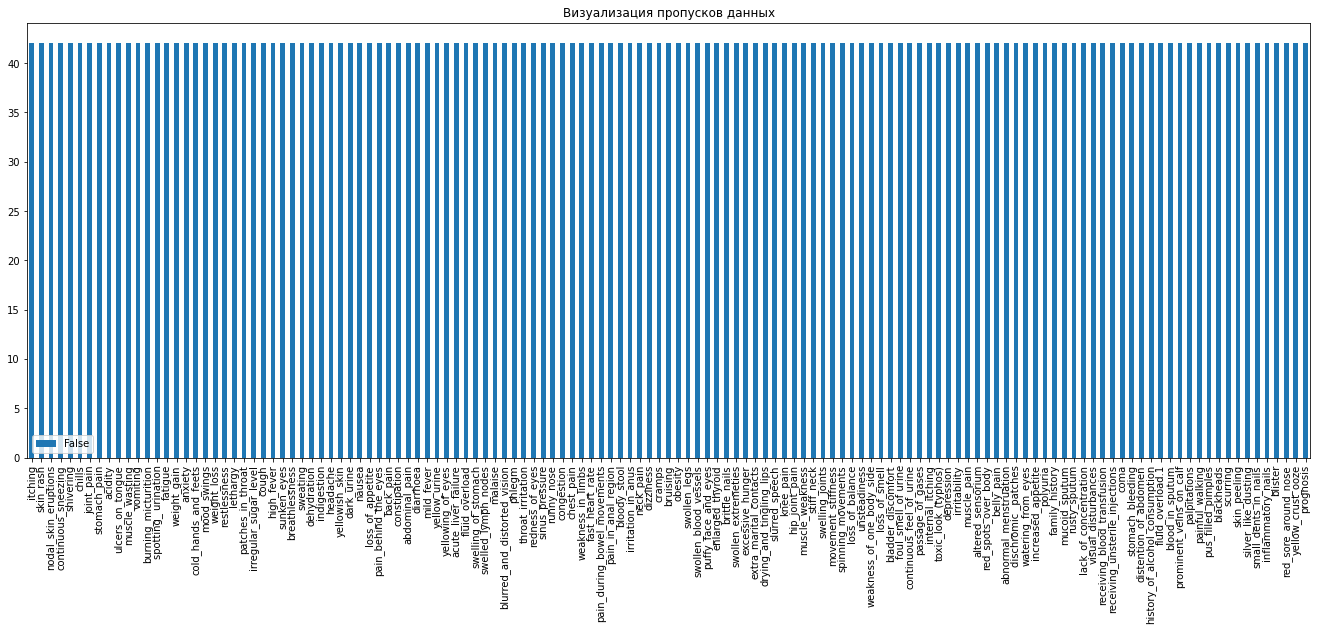

In [ ]:
dftest.isna().apply(pd.Series.value_counts).transpose().plot(kind = 'bar', stacked = True, figsize = (23,8))
plt.legend(loc='lower left')
plt.title('Визуализация пропусков данных')
plt.show()

Дерево решений строим

In [ ]:
X = dftrain.drop('prognosis', axis = 1).copy()
X.head()

itching  skin_rash  ...  red_sore_around_nose  yellow_crust_ooze
0        1          1  ...                     0                  0
1        0          1  ...                     0                  0
2        1          0  ...                     0                  0
3        1          1  ...                     0                  0
4        1          1  ...                     0                  0

[5 rows x 132 columns]

In [ ]:
y = dftrain['prognosis'].copy()
y.head()

0    Fungal infection
1    Fungal infection
2    Fungal infection
3    Fungal infection
4    Fungal infection
Name: prognosis, dtype: object

In [ ]:
X.dtypes

itching                 int64
skin_rash               int64
nodal_skin_eruptions    int64
continuous_sneezing     int64
shivering               int64
                        ...  
small_dents_in_nails    int64
inflammatory_nails      int64
blister                 int64
red_sore_around_nose    int64
yellow_crust_ooze       int64
Length: 132, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_test.head()

(3690, 132)
(3690,)
(1230, 132)
(1230,)


itching  skin_rash  ...  red_sore_around_nose  yellow_crust_ooze
1525        0          0  ...                     0                  0
1013        0          0  ...                     0                  0
1892        0          0  ...                     0                  0
1972        0          0  ...                     0                  0
873         0          0  ...                     0                  0

[5 rows x 132 columns]

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt = clf_dt.fit(X_train, y_train)

In [ ]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

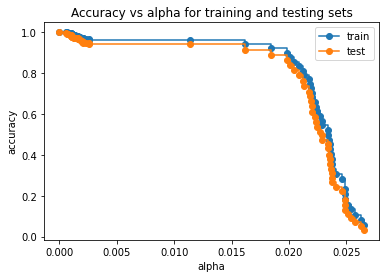

In [ ]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

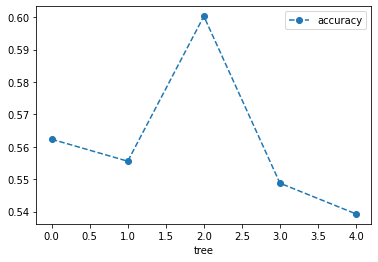

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.023)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

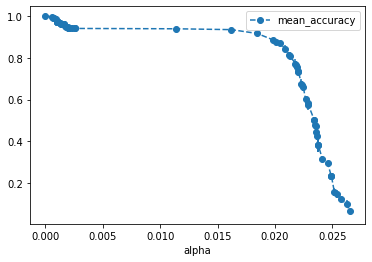

In [ ]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--')

In [ ]:
alpha_results[(alpha_results['alpha'] > 0.001)
             &
             (alpha_results['alpha'] < 0.005)]

alpha  mean_accuracy       std
5   0.001024       0.971816  0.003137
6   0.001032       0.971816  0.003137
7   0.001046       0.971816  0.003137
8   0.001057       0.971816  0.003137
9   0.001065       0.971816  0.003137
10  0.001069       0.971816  0.003137
11  0.001072       0.971816  0.003137
12  0.001075       0.971816  0.003137
13  0.001301       0.968564  0.002764
14  0.001317       0.965854  0.003471
15  0.001324       0.962873  0.003595
16  0.001353       0.961789  0.003137
17  0.001581       0.960434  0.003018
18  0.001589       0.960434  0.003018
19  0.001594       0.960434  0.003018
20  0.001742       0.952304  0.006605
21  0.001844       0.950136  0.007036
22  0.001946       0.947696  0.006215
23  0.001976       0.945799  0.005999
24  0.002067       0.943902  0.007302
25  0.002068       0.943902  0.007302
26  0.002072       0.943902  0.007302
27  0.002353       0.943631  0.007201
28  0.002556       0.943360  0.007491
29  0.002607       0.941463  0.005580

In [ ]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.001)
             &
             (alpha_results['alpha'] < 0.005)]['alpha']

ideal_ccp_alpha

5     0.001024
6     0.001032
7     0.001046
8     0.001057
9     0.001065
10    0.001069
11    0.001072
12    0.001075
13    0.001301
14    0.001317
15    0.001324
16    0.001353
17    0.001581
18    0.001589
19    0.001594
20    0.001742
21    0.001844
22    0.001946
23    0.001976
24    0.002067
25    0.002068
26    0.002072
27    0.002353
28    0.002556
29    0.002607
Name: alpha, dtype: float64

In [ ]:
ideal_ccp_alpha = 0.001024

In [ ]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42,
                                       ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

In [ ]:
cn=dftrain.prognosis
fn=list(dftrain.columns)

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=800)
plot_tree(clf_dt_pruned,
          filled=True,
          rounded=True,
          feature_names = fn,
               class_names=cn);
fig.savefig('1.png')

Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,y)
score = classifiern.feature_importances_
print(score)

[0.01821427 0.0062187  0.00774081 0.00730906 0.0058165  0.01062919
 0.01163505 0.01175886 0.00545769 0.00412645 0.00555697 0.01410669
 0.00593652 0.00779927 0.01283318 0.00068953 0.00167139 0.00047418
 0.00238943 0.01369846 0.00246481 0.00411958 0.00649101 0.00098442
 0.0084369  0.01074815 0.00669516 0.01102272 0.01060362 0.0060213
 0.00154238 0.00779924 0.00813106 0.01587875 0.01181549 0.00978778
 0.01462669 0.00611977 0.00271471 0.01095613 0.01354458 0.01437794
 0.00190986 0.01418952 0.001273   0.         0.00579708 0.00605318
 0.00929562 0.00271389 0.00644641 0.00325054 0.00475097 0.00396444
 0.00273755 0.00379669 0.0139424  0.00418219 0.00869305 0.00514056
 0.00511021 0.0064418  0.00700032 0.00729803 0.00729815 0.0036864
 0.00729241 0.00375404 0.00583533 0.00050146 0.00077339 0.0067908
 0.00600982 0.00624629 0.00639668 0.00690512 0.00107206 0.00806876
 0.00826347 0.00927326 0.011881   0.00247248 0.00365842 0.00948157
 0.00258568 0.01033646 0.01554962 0.0032391  0.00405441 0.0116186

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 1.0


In [ ]:
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)

[[21  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 28  0  0]
 [ 0  0  0 ...  0 34  0]
 [ 0  0  0 ...  0  0 33]]


KNN  - Метод k-ближайших соседей -  (K-Nearest Neighbors)

In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 14.3MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=37da2ebb513541ccc9768faa6d389f15a1c4637fa89f41b7848557fc6dee5fcf
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=41)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.9991869918699187


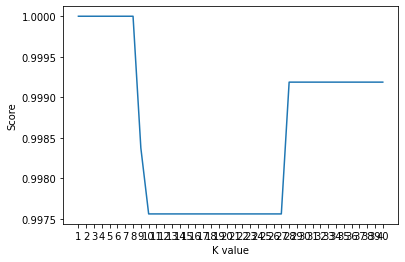

Maximum KNN Score is 100.00%


In [ ]:
scoreList = []
for i in range(1,41):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))

plt.plot(range(1,41), scoreList)
plt.xticks(np.arange(1,41,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))

Лучше брать до 9 соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 1.0



Метод опорных векторов (Support Vector Machines)

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
pred_y = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,pred_y))

Accuracy Score: 1.0


In [ ]:
#Normalize Features


scaler = StandardScaler() #normalize means we neewd to give a range in which it is expecting
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train[:5,:]

array([[-0.40773185, -0.43845816, -0.15169315, -0.21359305, -0.15355248,
         2.26936114, -0.40274648, -0.21566555, -0.21080359, -0.14791077,
        -0.14981285, -0.79908918, -0.21080359, -0.1469513 ,  1.23447957,
        -0.15630378, -0.1625595 , -0.15447451, -0.22111403, -0.32115263,
        -0.22312917, -0.32727773, -0.15539158, -0.15539158, -0.3559741 ,
         1.62120899, -0.14501493,  3.20693057,  2.4745812 , -0.1469513 ,
        -0.21635275, -0.55418416, -0.47658859, -0.35838578, -0.55836081,
        -0.56170101, -0.16517521, -0.22446444, -0.21497654, -0.51267307,
        -0.3559741 , -0.28041394, -0.15990548, -0.44852188, -0.15355248,
         0.        , -0.15447451, -0.27589035,  2.40740111, -0.2781587 ,
         3.617177  , -0.15075567, -0.15075567, -0.15075567, -0.15075567,
        -0.15075567,  2.51136033, -0.1469513 ,  4.40303763, -0.15169315,
        -0.14981285, -0.15169315, -0.14981285, -0.21840369, -0.26958193,
        -0.14981285, -0.14981285, -0.21840369, -0.1

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='sigmoid') #scikit learn support vector classifier
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf.predict(X_train)
print(y_pred)
print(accuracy_score(y_train, y_pred))

['Pneumonia' 'Tuberculosis' 'Hyperthyroidism' ... 'Allergy'
 'Alcoholic hepatitis' 'Common Cold']
0.9986449864498645


Функции, используемые в SVM, называются ядрами, и разные ядра лучше работают с разными наборами данных, поэтому мы должны сравнить их, чтобы узнать, какой из них дает лучшую границу решения.

In [ ]:
for k in ('linear', 'poly','rbf','sigmoid'):
    clf = svm.SVC(kernel=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(k)
    print(accuracy_score(y_train, y_pred)) #this process of trying different parmeters for our svm is known as Hyperparameter optimisation

linear
1.0
poly
0.9929539295392954
rbf
1.0
sigmoid
0.9986449864498645


In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#делаем предсказание
patient = np.array([[1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
patient = scaler.transform(patient)
clf.predict(patient)

array(['Fungal infection'], dtype=object)

In [ ]:
patient = np.array([X_test.iloc[0]])
patient = scaler.transform(patient)
print(clf.predict(patient))
print(y_test.iloc[0])

['Heart attack']
Heart attack


In [ ]:
X_test = scaler.transform(X_test)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [ ]:
print(classification_report(y_test, y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        21
                                   AIDS       1.00      1.00      1.00        27
                                   Acne       1.00      1.00      1.00        34
                    Alcoholic hepatitis       1.00      1.00      1.00        31
                                Allergy       1.00      1.00      1.00        28
                              Arthritis       1.00      1.00      1.00        28
                       Bronchial Asthma       1.00      1.00      1.00        34
                   Cervical spondylosis       1.00      1.00      1.00        33
                            Chicken pox       1.00      1.00      1.00        25
                    Chronic cholestasis       1.00      1.00      1.00        26
                            Common Cold       1.00      1.00      1.00        38
                           

precision равна 1, наша модель избегает предсказания того, что люди болеют заболеванием, если на самом деле это не так. Ложноположительный результат

recall : равен 1, наша модель правильно предсказала, что все люди с заболеванием действительно болеют. Ложноотрицательный результат

Нам нужна высокая решимость и отзывчивость

F1: Это своего рода пессимистичный (худший) средний показатель точности и запоминания.

Случайный лес (Random Forests)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 1.0


Xgboost

In [ ]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred5))

Accuracy Score: 1.0


In [ ]:
results = pd.DataFrame({
    'Model': ['Decision Tree' ,'Logistic Regression','KNN', 'SVC','Random Forest','Xgboost'],
    'Score': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df)

                     Model
Score                     
1.0          Decision Tree
1.0    Logistic Regression
1.0                    KNN
1.0                    SVC
1.0          Random Forest
1.0                Xgboost


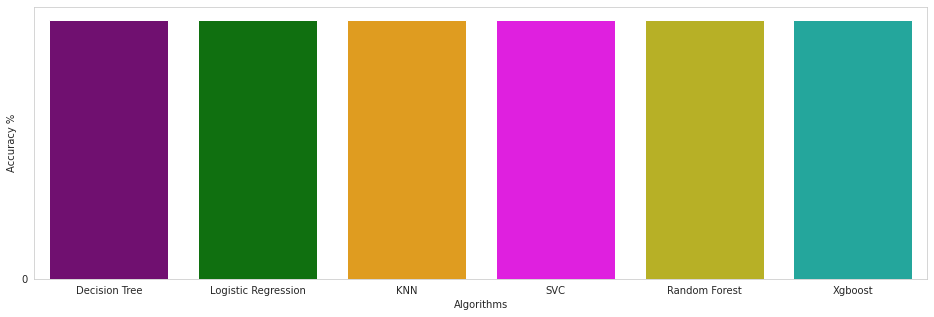

In [ ]:
import seaborn as sns

methods = ['Decision Tree' ,'Logistic Regression','KNN', 'SVC','Random Forest','Xgboost']
accuracy = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()